**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

* We mount our drive.
* Create a new folder. 
* Copy the data set to the new folder.
* change directory to new folder.
* Unzip the folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!mkdir '/content/drive/MyDrive/datasets'
%cd '/content/drive/MyDrive/datasets/'
!gdown --id "1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs" -O "/content/drive/MyDrive/datasets/CNN_assignment.zip"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
To: /content/drive/MyDrive/datasets/CNN_assignment.zip
100% 824M/824M [00:08<00:00, 99.1MB/s]


In [ ]:
#unzip the data and rename the folder.
!unzip -q "/content/drive/MyDrive/datasets/CNN_assignment.zip"
!mv "Skin cancer ISIC The International Skin Imaging Collaboration" "skin_cancer_data"

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [45]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/drive/MyDrive/datasets/skin_cancer_data'
data_dir_train = pathlib.Path(root_path, 'Train')
data_dir_test = pathlib.Path(root_path, 'Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [46]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [47]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  crop_to_aspect_ratio=True)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [48]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  crop_to_aspect_ratio=True)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [49]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

KeyboardInterrupt: ignored

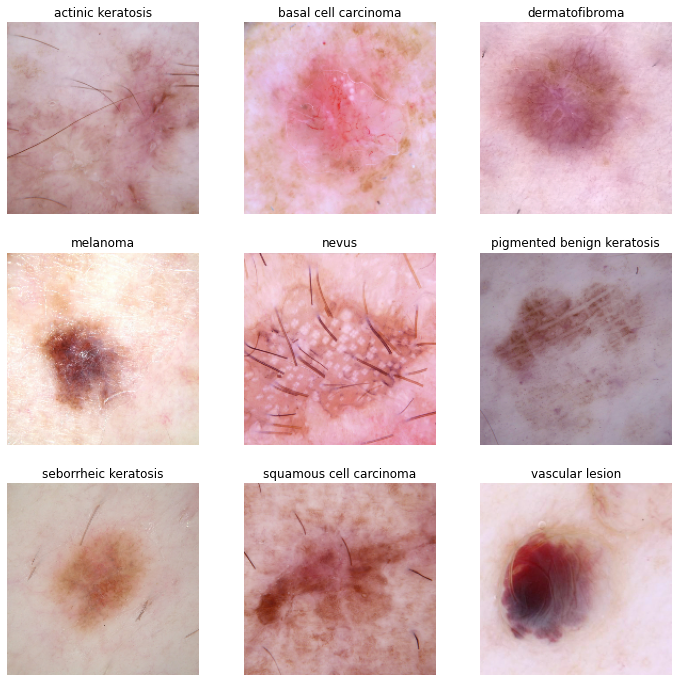

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(12, 12))
axs = axs.flatten()
required_index = list(range(9))
i=0
while i<10:
    for images, labels in train_ds.take(1):
        if i >10:
            break
        for j, label in enumerate(labels):
            if label == i:
                ax = axs[i]
                ax.imshow(images[j].numpy().astype("uint8"))
                ax.set_title(class_names[i])
                ax.axis("off")
                i = i + 1
            if i >10:
                break
        

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [50]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
input_shape = (32, 180, 180, 3)
activation='relu'

model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255, ))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=activation, input_shape=input_shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=activation))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation=activation))
model.add(Dense(9))
model.add(Activation('softmax'))



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.build(input_shape)
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (32, 180, 180, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (32, 180, 180, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (32, 180, 180, 32)        9248      
                                                                 
 conv2d_26 (Conv2D)          (32, 180, 180, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (32, 180, 180, 64)        36928     
                                                                 
 conv2d_28 (Conv2D)          (32, 180, 180, 64)        36928     
                                                                 
 conv2d_29 (Conv2D)          (32, 180, 180, 64)       

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 23s 366ms/step - loss: 2.5565 - accuracy: 0.1886 - val_loss: 1.9751 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 19s 342ms/step - loss: 2.0130 - accuracy: 0.2266 - val_loss: 1.9639 - val_accuracy: 0.2170
Epoch 3/20
56/56 [==============================] - 19s 343ms/step - loss: 1.9349 - accuracy: 0.2779 - val_loss: 2.0081 - val_accuracy: 0.2438
Epoch 4/20
56/56 [==============================] - 19s 338ms/step - loss: 1.9171 - accuracy: 0.2785 - val_loss: 1.9204 - val_accuracy: 0.2595
Epoch 5/20
56/56 [==============================] - 19s 337ms/step - loss: 1.8337 - accuracy: 0.3499 - val_loss: 1.7837 - val_accuracy: 0.3557
Epoch 6/20
56/56 [==============================] - 19s 339ms/step - loss: 1.7241 - accuracy: 0.3722 - val_loss: 1.7325 - val_accuracy: 0.3579
Epoch 7/20
56/56 [==============================] - 19s 340ms/step - loss: 1.6346 - accuracy: 0.4241 - val_loss: 1.6102 - val_accuracy: 0.4720

### Visualizing training results

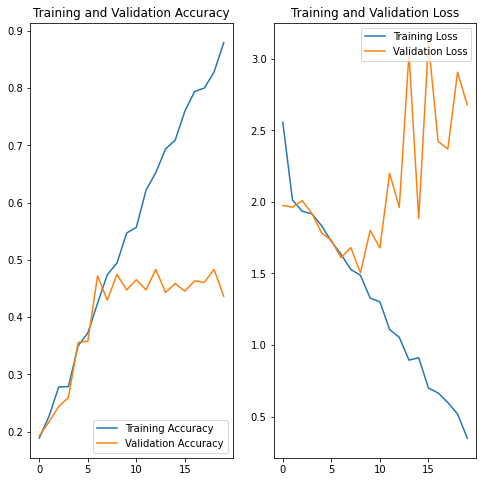

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


### Write your findings here

## Observations:
- The train accuracy is high and validation accuracy is fairly low, indicates an over fit.
- Regularisation/drop out / class rebalance etc may help.

In [51]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# we will add data augmentation 
#we will use rotation, flipping,and zoom.
data_augmentation = Sequential([
  layers.Rescaling(1./255),
  layers.RandomFlip("horizontal_and_vertical", seed=123),
  layers.RandomRotation(1, seed=123),
  layers.RandomZoom(0.2, seed=123)
])



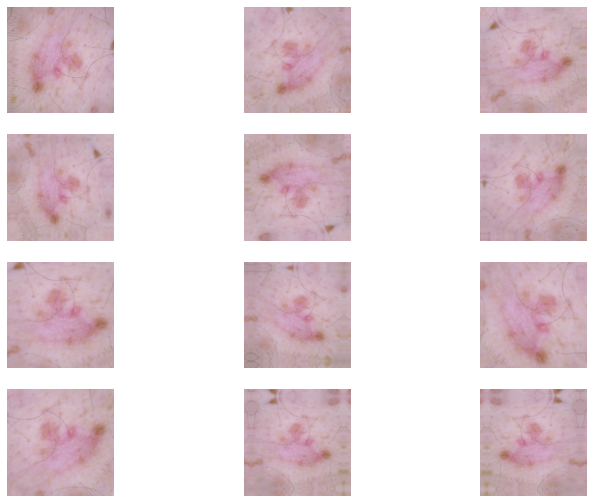

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
_, axs = plt.subplots(4,3,figsize=(12, 9))
axs = axs.flatten()
images, labels = next(iter(train_ds))
#plot orginalimage
axs[0].imshow(images[0]/255.)
axs[0].axis("off")
#plot augmented images
for ax in axs[1:]:
  augmented_images = data_augmentation(images)
  ax.imshow(augmented_images[0])
  ax.axis("off")


### Todo:
### Create the model, compile and train the model


In [52]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here
input_shape = (32, 180, 180, 3)
activation='relu'

model = Sequential()
#data augumentation strategy
model.add(tf.keras.layers.Rescaling(1./255, ))
model.add(tf.keras.layers.RandomFlip(mode='horizontal_and_vertical', seed=123))
model.add(tf.keras.layers.RandomRotation((-1,1), seed=123))
model.add(tf.keras.layers.RandomZoom(0.2, seed=123))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=activation, input_shape=input_shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation=activation))
model.add(Dropout(0.4))
model.add(Dense(9))
model.add(Activation('softmax'))

model.build(input_shape)

### Compiling the model

In [53]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [54]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
batch_size = 32
history = model.fit(train_ds, batch_size=batch_size,
                    validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 156s 619ms/step - loss: 3.8489 - accuracy: 0.3242 - val_loss: 3.0231 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 3s 49ms/step - loss: 1.8314 - accuracy: 0.3862 - val_loss: 3.6911 - val_accuracy: 0.2125
Epoch 3/20
56/56 [==============================] - 3s 48ms/step - loss: 1.6261 - accuracy: 0.4224 - val_loss: 3.2829 - val_accuracy: 0.1723
Epoch 4/20
56/56 [==============================] - 3s 48ms/step - loss: 1.5495 - accuracy: 0.4436 - val_loss: 2.5905 - val_accuracy: 0.1745
Epoch 5/20
56/56 [==============================] - 3s 49ms/step - loss: 1.4680 - accuracy: 0.4866 - val_loss: 2.8450 - val_accuracy: 0.2394
Epoch 6/20
56/56 [==============================] - 3s 49ms/step - loss: 1.5151 - accuracy: 0.4648 - val_loss: 3.4428 - val_accuracy: 0.2640
Epoch 7/20
56/56 [==============================] - 3s 48ms/step - loss: 1.4437 - accuracy: 0.5017 - val_loss: 4.3999 - val_accuracy: 0.2148
Epoch 8/20

### Visualizing the results

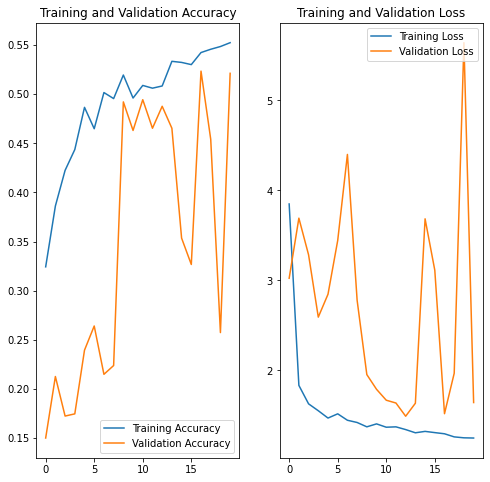

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## Observations:
- The train and validation accuracy are fairly low, indicates an under fit.
- There is further scope for improvement.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
i=0
vals = np.fromiter(train_ds.unbatch().map(lambda x, y: y), int)
vals

array([6, 3, 3, ..., 4, 5, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


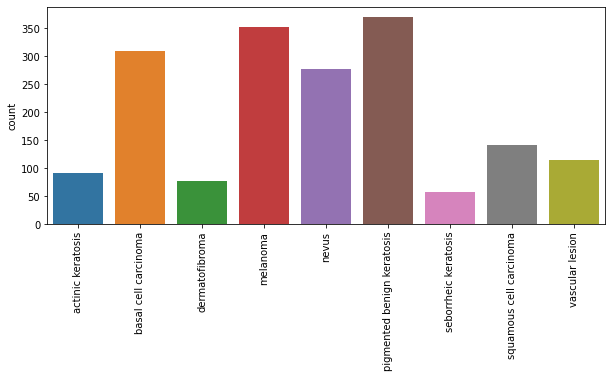

In [ ]:
import seaborn as sns

_,ax=plt.subplots(1,1, figsize=(10,4))
ax = sns.countplot(vals, ax=ax)
_= ax.set_xticklabels(class_names, rotation=90)

#### **Todo:** Write your findings here: 
- **There is lot of imbalance in class distribution**

#### - Which class has the least number of samples?
- **_Seborrheic keratosis_ has least number of samples**

#### - Which classes dominate the data in terms proportionate number of samples?
- **_Pigmented benign keratosis_ has most number of samples**



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
#We create a copy of data base
%cp -a '/content/drive/MyDrive/datasets/skin_cancer_data/.' '/content/drive/MyDrive/datasets/skin_cancer_data_aug/'

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [3]:
root_path = '/content/drive/MyDrive/datasets/skin_cancer_data_aug'
data_dir_train_aug = pathlib.Path(root_path, 'Train')
data_dir_test_aug = pathlib.Path(root_path, 'Test')

In [ ]:

path_to_training_dataset = data_dir_train_aug
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(pathlib.Path(path_to_training_dataset,i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/datasets/skin_cancer_data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0F77E6850>: 100%|██████████| 500/500 [00:18<00:00, 27.47 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/datasets/skin_cancer_data/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE0F779ED90>: 100%|██████████| 500/500 [00:18<00:00, 27.02 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/datasets/skin_cancer_data/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE0F7748490>: 100%|██████████| 500/500 [00:20<00:00, 24.93 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/datasets/skin_cancer_data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE0F6B8C510>: 100%|██████████| 500/500 [01:24<00:00,  5.92 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/datasets/skin_cancer_data/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE0F74524D0>: 100%|██████████| 500/500 [01:21<00:00,  6.17 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/datasets/skin_cancer_data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0F4876F10>: 100%|██████████| 500/500 [00:22<00:00, 22.70 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/datasets/skin_cancer_data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE1007DADD0>: 100%|██████████| 500/500 [00:41<00:00, 12.05 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/datasets/skin_cancer_data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE22BD41C50>: 100%|██████████| 500/500 [00:18<00:00, 27.09 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/datasets/skin_cancer_data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0F7F695D0>: 100%|██████████| 500/500 [00:18<00:00, 27.21 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train_aug.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [39]:
path_list = [x for x in data_dir_train_aug.glob('*/*.jpg')]
lesion_list = [x.parts[-2] for x in data_dir_train_aug.glob('*/*.jpg')]

In [40]:
path_list_new = [x for x in data_dir_train_aug.glob('*/output/*.jpg')]
lesion_list_new = [x.parts[-3] for x in data_dir_train_aug.glob('*/output/*.jpg')]

In [41]:
dataframe_dict= dict(zip(path_list, lesion_list))
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [42]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [43]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [44]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [4]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  crop_to_aspect_ratio=True)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  crop_to_aspect_ratio=True)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [29]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here
input_shape = (32, 180, 180, 3)
activation='relu'

model = Sequential()
#data augumentation strategy
model.add(tf.keras.layers.Rescaling(1./255, ))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=activation, input_shape=input_shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation=activation))
model.add(Dropout(0.4))
model.add(Dense(9))
model.add(Activation('softmax'))

model.build(input_shape)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [30]:
## your code goes here
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (32, 180, 180, 3)         0         
                                                                 
 conv2d_31 (Conv2D)          (32, 180, 180, 32)        896       
                                                                 
 batch_normalization_31 (Bat  (32, 180, 180, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (32, 180, 180, 32)        9248      
                                                                 
 batch_normalization_32 (Bat  (32, 180, 180, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (32, 90, 90, 32)        

#### **Todo:**  Train your model

In [32]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(train_ds, batch_size=batch_size,
                    validation_data=val_ds, epochs=epochs)

Epoch 1/30
169/169 [==============================] - 41s 228ms/step - loss: 3.0171 - accuracy: 0.2669 - val_loss: 11.3673 - val_accuracy: 0.1685
Epoch 2/30
169/169 [==============================] - 40s 229ms/step - loss: 1.7600 - accuracy: 0.3370 - val_loss: 8.9096 - val_accuracy: 0.1032
Epoch 3/30
169/169 [==============================] - 40s 231ms/step - loss: 1.6623 - accuracy: 0.3555 - val_loss: 1.6618 - val_accuracy: 0.3883
Epoch 4/30
169/169 [==============================] - 41s 237ms/step - loss: 1.6289 - accuracy: 0.3739 - val_loss: 2.5174 - val_accuracy: 0.3066
Epoch 5/30
169/169 [==============================] - 42s 244ms/step - loss: 1.5242 - accuracy: 0.3969 - val_loss: 2.6494 - val_accuracy: 0.3794
Epoch 6/30
169/169 [==============================] - 41s 235ms/step - loss: 1.4546 - accuracy: 0.4190 - val_loss: 4.8333 - val_accuracy: 0.2821
Epoch 7/30
169/169 [==============================] - 41s 234ms/step - loss: 1.4171 - accuracy: 0.4455 - val_loss: 1.5226 - val_a

#### **Todo:**  Visualize the model results

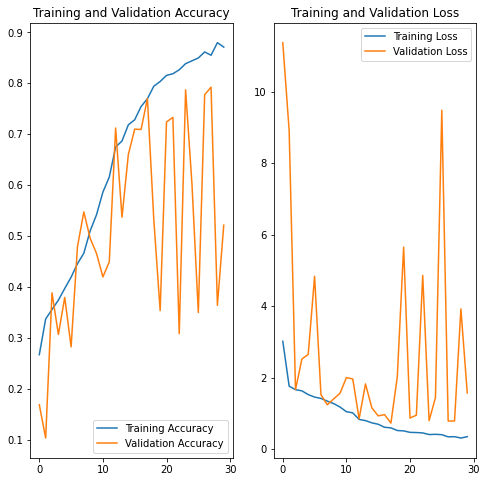

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The over fitting issue is sorted because of balencing of class.

**Another Model**

We create another modle with slightly different architect.

In [34]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here
input_shape = (32, 180, 180, 3)
activation='relu'

model = Sequential()
#data augumentation strategy
model.add(tf.keras.layers.Rescaling(1./255, ))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=activation, input_shape=input_shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation=activation))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation=activation))
model.add(Dropout(0.4))
model.add(Dense(9))
model.add(Activation('softmax'))

model.build(input_shape)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [35]:
## your code goes here
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (32, 180, 180, 3)         0         
                                                                 
 conv2d_37 (Conv2D)          (32, 180, 180, 32)        896       
                                                                 
 batch_normalization_37 (Bat  (32, 180, 180, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (32, 90, 90, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (32, 90, 90, 32)          9248      
                                                                 
 batch_normalization_38 (Bat  (32, 90, 90, 32)        

#### **Todo:**  Train your model

In [37]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(train_ds, batch_size=batch_size,
                    validation_data=val_ds, epochs=epochs)

Epoch 1/30
169/169 [==============================] - 39s 217ms/step - loss: 2.6836 - accuracy: 0.2761 - val_loss: 7.0593 - val_accuracy: 0.1522
Epoch 2/30
169/169 [==============================] - 37s 214ms/step - loss: 1.7209 - accuracy: 0.3570 - val_loss: 16.4116 - val_accuracy: 0.2138
Epoch 3/30
169/169 [==============================] - 39s 224ms/step - loss: 1.5957 - accuracy: 0.3950 - val_loss: 1.9326 - val_accuracy: 0.3883
Epoch 4/30
169/169 [==============================] - 38s 218ms/step - loss: 1.5387 - accuracy: 0.4076 - val_loss: 1.6291 - val_accuracy: 0.4187
Epoch 5/30
169/169 [==============================] - 38s 220ms/step - loss: 1.4900 - accuracy: 0.4236 - val_loss: 1.4067 - val_accuracy: 0.4625
Epoch 6/30
169/169 [==============================] - 37s 214ms/step - loss: 1.4857 - accuracy: 0.4292 - val_loss: 13.1779 - val_accuracy: 0.1477
Epoch 7/30
169/169 [==============================] - 37s 215ms/step - loss: 1.3859 - accuracy: 0.4727 - val_loss: 2.1171 - val_

#### **Todo:**  Visualize the model results

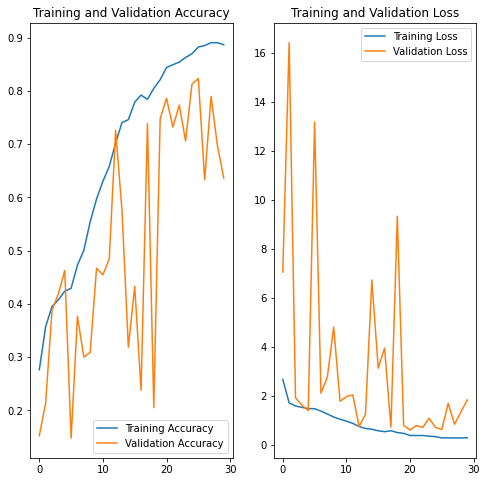

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## Observations:
- There are some oscillations in validation accuracy, This could be rectified by tuning the parameters.
- The train and validation accuracy are fairly high, indicates a good fit.
- Class rebalance has helped a lot, There is further scope for improvement.